In [35]:
import pandas as pd
COL_LIST = ['middlePIP_left_Y', 'littlePIP_right_Y', 'middleTip_right_Y', 'thumbIP_left_X', 'middleMCP_right_Y', 'indexMCP_right_X', 'middleTip_right_X', 'middlePIP_right_Y', 'rightElbow_X', 'indexTip_left_Y', 'thumbMP_right_Y', 'neck_X', 'wrist_right_Y', 'middleDIP_right_Y', 'ringDIP_left_Y', 'indexTip_right_X', 'indexPIP_right_Y', 'ringMCP_right_Y', 'rightShoulder_Y', 'littleDIP_left_Y', 'thumbCMC_right_Y', 'ringTip_right_X', 'thumbCMC_left_X', 'rightShoulder_X', 'littlePIP_left_X', 'thumbIP_left_Y', 'thumbTip_left_Y', 'littleTip_left_X', 'littleTip_right_Y', 'thumbCMC_left_Y', 'indexMCP_left_X', 'ringDIP_left_X', 'middleTip_left_X', 'ringPIP_left_Y', 'ringPIP_left_X', 'middleTip_left_Y', 'ringMCP_left_Y', 'littleDIP_right_Y', 'indexMCP_right_Y', 'wrist_right_X', 'middlePIP_left_X', 'littleMCP_left_X', 'leftEye_X', 'thumbIP_right_Y', 'thumbMP_right_X', 'ringPIP_right_X', 'ringTip_left_X', 'thumbTip_left_X', 'leftShoulder_X', 'littleMCP_left_Y', 'thumbTip_right_Y', 'middleMCP_right_X', 'leftWrist_X', 'indexTip_left_X', 'ringMCP_left_X', 'nose_X', 'nose_Y', 'leftElbow_Y', 'ringTip_left_Y', 'indexPIP_left_X', 'littleTip_left_Y', 'middlePIP_right_X', 'neck_Y', 'leftElbow_X', 'rightEar_Y', 'littlePIP_left_Y', 'indexDIP_left_Y', 'thumbMP_left_X', 'rightWrist_Y', 'rightElbow_Y', 'indexMCP_left_Y', 'rightEye_Y', 'leftEar_X', 'middleMCP_left_X', 'indexPIP_right_X', 'thumbMP_left_Y', 'rightWrist_X', 'leftShoulder_Y', 'leftEar_Y', 'indexDIP_right_Y', 'littleMCP_right_X', 'indexDIP_left_X', 'ringMCP_right_X', 'thumbIP_right_X', 'indexTip_right_Y', 'wrist_left_Y', 'littleTip_right_X', 'littleDIP_left_X', 'middleDIP_left_X', 'rightEar_X', 'ringDIP_right_Y', 'ringTip_right_Y', 'ringPIP_right_Y', 'middleDIP_left_Y', 'thumbTip_right_X', 'leftWrist_Y', 'middleMCP_left_Y', 'rightEye_X', 'middleDIP_right_X', 'littlePIP_right_X', 'indexDIP_right_X', 'littleDIP_right_X', 'littleMCP_right_Y', 'thumbCMC_right_X', 'ringDIP_right_X', 'wrist_left_X', 'indexPIP_left_Y', 'leftEye_Y']
DEL_COL_LIST = ['root_Y', 'labels', 'video_size_width', 'video_fps', 'video_size_height', 'root_X']

HAND_IDENTIFIERS_PREFIX = [
 'wrist_right',
 'wrist_left',
 'indexTip_right',
 'indexTip_left',
 'indexDIP_right',
 'indexDIP_left',
 'indexPIP_right',
 'indexPIP_left',
 'indexMCP_right',
 'indexMCP_left',
 'middleTip_right',
 'middleTip_left',
 'middleDIP_right',
 'middleDIP_left',
 'middlePIP_right',
 'middlePIP_left',
 'middleMCP_right',
 'middleMCP_left',
 'ringTip_right',
 'ringTip_left',
 'ringDIP_right',
 'ringDIP_left',
 'ringPIP_right',
 'ringPIP_left',
 'ringMCP_right',
 'ringMCP_left',
 'littleTip_right',
 'littleTip_left',
 'littleDIP_right',
 'littleDIP_left',
 'littlePIP_right',
 'littlePIP_left',
 'littleMCP_right',
 'littleMCP_left',
 'thumbTip_right',
 'thumbTip_left',
 'thumbIP_right',
 'thumbIP_left',
 'thumbMP_right',
 'thumbMP_left',
 'thumbCMC_right',
 'thumbCMC_left'
]

BODY_IDENTIFIERS_PREFIX = [
    "nose",
    "neck",
    "rightEye",
    "leftEye",
    "rightEar",
    "leftEar",
    "rightShoulder",
    "leftShoulder",
    "rightElbow",
    "leftElbow",
    "rightWrist",
    "leftWrist"
]

# LSA64

In [75]:
import pandas as pd
import ast

# Your CSV file path
csv_path = "D:\Spoter_transformer_SLR\datasets\LSA64_60fps.csv"

# Read the CSV file into a Pandas DataFrame
whole_df = pd.read_csv(csv_path)

df = whole_df[COL_LIST].copy()

# Assuming your data is stored as strings in the CSV, convert them back to lists
for col in df.columns:
    df[col] = df[col].apply(ast.literal_eval)

# Create a new DataFrame to store the percentage of zeros for each column
count_df = pd.DataFrame(columns=['Identifies', 'Zero count', 'Sample count'])

# Calculate the percentage of zeros for each column
for col in df.columns:
    zero_count = df[col].apply(lambda x: x.count(0)).sum()
    sample_count = df[col].apply(lambda x: len(x)).sum()
    count_df = count_df.append({'Identifies': col, 'Zero count': zero_count, 'Sample count': sample_count}, ignore_index=True)

In [76]:
count_df['Keypoint'] = count_df['Identifies'].apply(
    lambda x: x.split("_")[0] if x.split("_")[0] in BODY_IDENTIFIERS_PREFIX else x.split("_")[0] + "_" + x.split("_")[1]
)

grouped_df = count_df.groupby('Keypoint').agg({'Zero count': 'sum', 'Sample count': 'sum'}).reset_index()
grouped_df['Zero Percentage %'] = grouped_df['Zero count'] / grouped_df['Sample count'] * 100

grouped_df = grouped_df.sort_values(by='Zero Percentage %', ascending=False)

In [78]:
grouped_df

,Keypoint,Zero count,Sample count,Zero Percentage %
19,littleTip_left,401342,528552,75.932359
13,littleDIP_left,401292,528552,75.922899
17,littlePIP_left,401144,528552,75.894898
42,ringTip_left,400730,528552,75.816571
50,thumbTip_left,400416,528552,75.757163
36,ringDIP_left,400374,528552,75.749217
46,thumbIP_left,400086,528552,75.694728
15,littleMCP_left,399736,528552,75.628510
40,ringPIP_left,399722,528552,75.625861
27,middleTip_left,399686,528552,75.619050


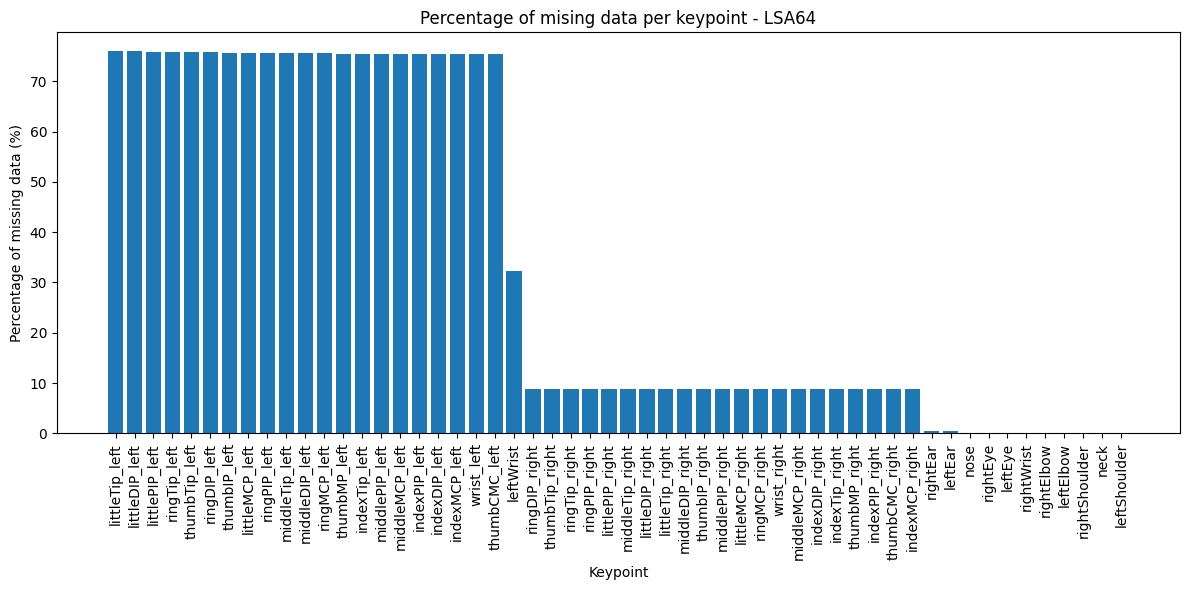

In [77]:
import matplotlib.pyplot as plt

keypoints = grouped_df['Keypoint'].tolist()
zero_percentage = grouped_df['Zero Percentage %'].tolist()

plt.figure(figsize=(12, 6))
plt.bar(keypoints, zero_percentage)
plt.xticks(rotation=90)
plt.xlabel("Keypoint")
plt.ylabel("Percentage of missing data (%)")
plt.title("Percentage of mising data per keypoint - LSA64")
plt.tight_layout()
plt.show()

# WLASL

In [50]:
WLASL100_train = pd.read_csv('D:\Spoter_transformer_SLR\datasets\WLASL100_train_25fps.csv')
WLASL100_test = pd.read_csv('D:\Spoter_transformer_SLR\datasets\WLASL100_test_25fps.csv')
WLASL100_val = pd.read_csv('D:\Spoter_transformer_SLR\datasets\WLASL100_val_25fps.csv')
WLASL100 = pd.concat([WLASL100_train, WLASL100_test, WLASL100_val], ignore_index=True)

In [70]:
df = WLASL100[COL_LIST].copy()

# Assuming your data is stored as strings in the CSV, convert them back to lists
for col in df.columns:
    df[col] = df[col].apply(ast.literal_eval)

# Create a new DataFrame to store the percentage of zeros for each column
count_df = pd.DataFrame(columns=['Identifies', 'Zero count', 'Sample count'])

# Calculate the percentage of zeros for each column
for col in df.columns:
    zero_count = df[col].apply(lambda x: x.count(0)).sum()
    sample_count = df[col].apply(lambda x: len(x)).sum()
    count_df = count_df.append({'Identifies': col, 'Zero count': zero_count, 'Sample count': sample_count}, ignore_index=True)

,Identifies,Zero count,Sample count
0,middlePIP_left_Y,81164,126225
1,littlePIP_right_Y,46616,126225
2,middleTip_right_Y,46596,126225
3,thumbIP_left_X,81206,126225
4,middleMCP_right_Y,46475,126225
...,...,...,...
103,thumbCMC_right_X,46435,126225
104,ringDIP_right_X,46561,126225
105,wrist_left_X,81144,126225
106,indexPIP_left_Y,81135,126225


In [71]:
count_df['Keypoint'] = count_df['Identifies'].apply(
    lambda x: x.split("_")[0] if x.split("_")[0] in BODY_IDENTIFIERS_PREFIX else x.split("_")[0] + "_" + x.split("_")[1]
)

grouped_df = count_df.groupby('Keypoint').agg({'Zero count': 'sum', 'Sample count': 'sum'}).reset_index()
grouped_df['Zero Percentage %'] = grouped_df['Zero count'] / grouped_df['Sample count'] * 100

grouped_df = grouped_df.sort_values(by='Zero Percentage %', ascending=False)

           Keypoint  Zero count  Sample count  Zero Percentage %
21   middleDIP_left      162664        252450          64.434145
42     ringTip_left      162636        252450          64.423054
50    thumbTip_left      162580        252450          64.400871
17   littlePIP_left      162576        252450          64.399287
13   littleDIP_left      162562        252450          64.393741
27   middleTip_left      162538        252450          64.384235
19   littleTip_left      162502        252450          64.369974
36     ringDIP_left      162460        252450          64.353337
15   littleMCP_left      162449        252450          64.348980
46     thumbIP_left      162412        252450          64.334324
6     indexTip_left      162382        252450          64.322440
40     ringPIP_left      162368        252450          64.316894
38     ringMCP_left      162346        252450          64.308180
25   middlePIP_left      162328        252450          64.301050
0     indexDIP_left      

In [ ]:
grouped_df

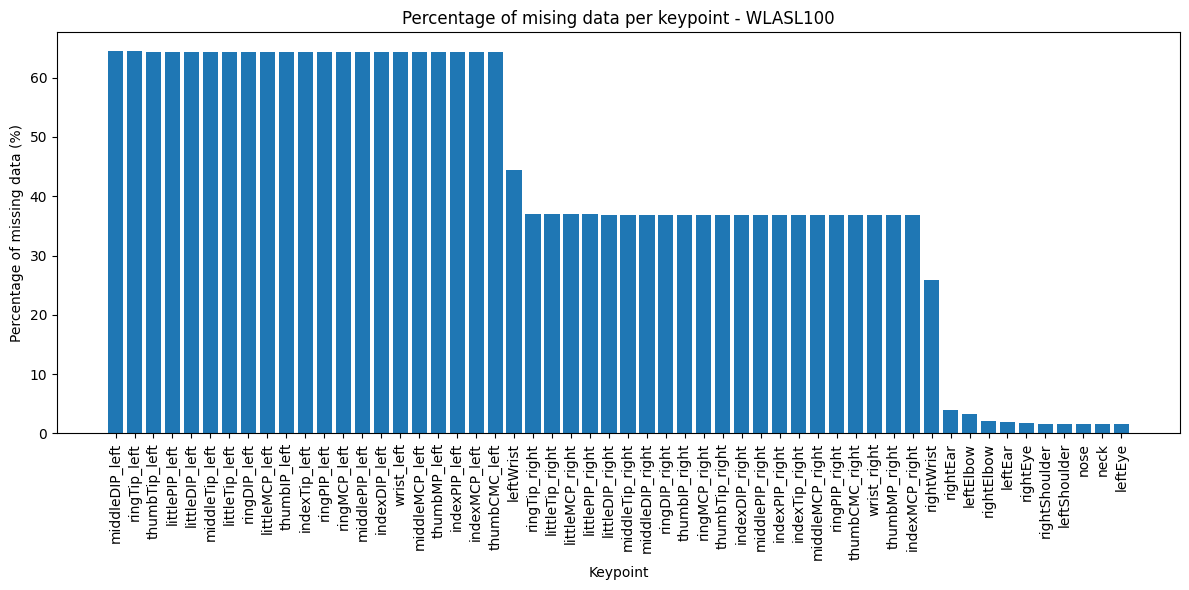

In [73]:
import matplotlib.pyplot as plt

keypoints = grouped_df['Keypoint'].tolist()
zero_percentage = grouped_df['Zero Percentage %'].tolist()

plt.figure(figsize=(12, 6))
plt.bar(keypoints, zero_percentage)
plt.xticks(rotation=90)
plt.xlabel("Keypoint")
plt.ylabel("Percentage of missing data (%)")
plt.title("Percentage of mising data per keypoint - WLASL100")
plt.tight_layout()
plt.show()